# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Откройте-файл-с-данными-и-изучите-общую-информацию." data-toc-modified-id="Откройте-файл-с-данными-и-изучите-общую-информацию.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Откройте файл с данными и изучите общую информацию.</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Удаление-пропусков" data-toc-modified-id="Удаление-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Удаление пропусков</a></span><ul class="toc-item"><li><span><a href="#Высота-потолков" data-toc-modified-id="Высота-потолков-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Высота потолков</a></span></li><li><span><a href="#Количество-этажей" data-toc-modified-id="Количество-этажей-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Количество этажей</a></span></li><li><span><a href="#Жилая-площадь" data-toc-modified-id="Жилая-площадь-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Жилая площадь</a></span></li><li><span><a href="#Аппартаменты" data-toc-modified-id="Аппартаменты-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Аппартаменты</a></span></li><li><span><a href="#Количество-балконов" data-toc-modified-id="Количество-балконов-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Количество балконов</a></span></li><li><span><a href="#Площадь-кухни" data-toc-modified-id="Площадь-кухни-2.1.6"><span class="toc-item-num">2.1.6&nbsp;&nbsp;</span>Площадь кухни</a></span></li><li><span><a href="#Населенный-пункт" data-toc-modified-id="Населенный-пункт-2.1.7"><span class="toc-item-num">2.1.7&nbsp;&nbsp;</span>Населенный пункт</a></span></li><li><span><a href="#Прочие-поля" data-toc-modified-id="Прочие-поля-2.1.8"><span class="toc-item-num">2.1.8&nbsp;&nbsp;</span>Прочие поля</a></span></li></ul></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Обработка-аномальных-значений" data-toc-modified-id="Обработка-аномальных-значений-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Обработка аномальных значений</a></span><ul class="toc-item"><li><span><a href="#Высота-потолков" data-toc-modified-id="Высота-потолков-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Высота потолков</a></span></li><li><span><a href="#Соотношение-суммы-жилой-и-кухонной-площади-и-общей-площади-объекта" data-toc-modified-id="Соотношение-суммы-жилой-и-кухонной-площади-и-общей-площади-объекта-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Соотношение суммы жилой и кухонной площади и общей площади объекта</a></span></li><li><span><a href="#Количество-комнат" data-toc-modified-id="Количество-комнат-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Количество комнат</a></span></li><li><span><a href="#Исследование-наличия-аномалий-в-цене" data-toc-modified-id="Исследование-наличия-аномалий-в-цене-2.4.4"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>Исследование наличия аномалий в цене</a></span></li></ul></li></ul></li><li><span><a href="#Добавление-новых-столбцов" data-toc-modified-id="Добавление-новых-столбцов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Добавление новых столбцов</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Исследование-отдельных-мер" data-toc-modified-id="Исследование-отдельных-мер-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Исследование отдельных мер</a></span></li><li><span><a href="#Анализ-скорости-продажи-квартир" data-toc-modified-id="Анализ-скорости-продажи-квартир-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Анализ скорости продажи квартир</a></span></li><li><span><a href="#Выявление-факторов,-влияющих-на-стоимость-объекта" data-toc-modified-id="Выявление-факторов,-влияющих-на-стоимость-объекта-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Выявление факторов, влияющих на стоимость объекта</a></span><ul class="toc-item"><li><span><a href="#График-зависимости-last_price-от-total_area." data-toc-modified-id="График-зависимости-last_price-от-total_area.-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>График зависимости <code>last_price</code> от <code>total_area</code>.</a></span></li><li><span><a href="#График-зависимости-last_price-от-living_area." data-toc-modified-id="График-зависимости-last_price-от-living_area.-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>График зависимости <code>last_price</code> от <code>living_area</code>.</a></span></li><li><span><a href="#График-зависимости-last_price-от-kitchen_area." data-toc-modified-id="График-зависимости-last_price-от-kitchen_area.-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>График зависимости <code>last_price</code> от <code>kitchen_area</code>.</a></span></li><li><span><a href="#График-зависимости-last_price-от-rooms." data-toc-modified-id="График-зависимости-last_price-от-rooms.-4.3.4"><span class="toc-item-num">4.3.4&nbsp;&nbsp;</span>График зависимости <code>last_price</code> от <code>rooms</code>.</a></span></li><li><span><a href="#График-зависимости-last_price-от-floor_type." data-toc-modified-id="График-зависимости-last_price-от-floor_type.-4.3.5"><span class="toc-item-num">4.3.5&nbsp;&nbsp;</span>График зависимости <code>last_price</code> от <code>floor_type</code>.</a></span></li><li><span><a href="#График-зависимости-last_price-от-даты-размещения." data-toc-modified-id="График-зависимости-last_price-от-даты-размещения.-4.3.6"><span class="toc-item-num">4.3.6&nbsp;&nbsp;</span>График зависимости <code>last_price</code> от даты размещения.</a></span></li></ul></li><li><span><a href="#Расчёт-средней-цены-одного-квадратного-метра-в-10-населённых-пунктах-с-наибольшим-числом-объявлений." data-toc-modified-id="Расчёт-средней-цены-одного-квадратного-метра-в-10-населённых-пунктах-с-наибольшим-числом-объявлений.-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Расчёт средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.</a></span></li><li><span><a href="#Расчёт-средней-цены-километра-расстояния-до-центра-города-для-Санкт-Петербурга" data-toc-modified-id="Расчёт-средней-цены-километра-расстояния-до-центра-города-для-Санкт-Петербурга-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Расчёт средней цены километра расстояния до центра города для Санкт-Петербурга</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Откройте файл с данными и изучите общую информацию. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.float_format', '{:.2f}'.format)

Считаем файл данных и сохраним его в переменную data.

In [3]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

Для ознакомления с данными выведем на экран первые 10 записей датафрейм, а также общую информацию о нём с помощью метода `info()`.

In [5]:
import numpy as np
np.save(train_features,'/datasets/fashion_mnist/train_features.npy')

NameError: name 'train_features' is not defined

In [4]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00
5,10,2890000.00,30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,3700000.00,37.30,2017-11-02T00:00:00,1,NaN,26.00,10.60,6,NaN,...,14.40,1.00,посёлок Парголово,52996.00,19143.00,0.00,NaN,0.00,NaN,155.00
7,5,7915000.00,71.60,2019-04-18T00:00:00,2,NaN,24.00,NaN,22,NaN,...,18.90,2.00,Санкт-Петербург,23982.00,11634.00,0.00,NaN,0.00,NaN,NaN
8,20,2900000.00,33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,5400000.00,61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,...,6.50,2.00,Санкт-Петербург,50898.00,15008.00,0.00,NaN,0.00,NaN,289.00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Итак, мы видим, что наш источник информации содержит более 23 тыс. записей и 22 столбца, ниже приведём описание каждого из них:
- <b>airports_nearest</b> — расстояние до ближайшего аэропорта в метрах (м)
- <b>balcony</b> — число балконов
- <b>ceiling_height</b> — высота потолков (м)
- <b>cityCenters_nearest</b> — расстояние до центра города (м)
- <b>days_exposition</b> — сколько дней было размещено объявление (от публикации до снятия)
- <b>first_day_exposition</b> — дата публикации
- <b>floor</b> — этаж
- <b>floors_total</b> — всего этажей в доме
- <b>is_apartment</b> — апартаменты (булев тип)
- <b>kitchen_area</b> — площадь кухни в квадратных метрах (м²)
- <b>last_price</b> — цена на момент снятия с публикации
- <b>living_area</b> — жилая площадь в квадратных метрах (м²)
- <b>locality_name</b> — название населённого пункта
- <b>open_plan</b> — свободная планировка (булев тип)
- <b>parks_around3000</b> — число парков в радиусе 3 км
- <b>parks_nearest</b> — расстояние до ближайшего парка (м)
- <b>ponds_around3000</b> — число водоёмов в радиусе 3 км
- <b>ponds_nearest</b> — расстояние до ближайшего водоёма (м)
- <b>rooms</b> — число комнат
- <b>studio</b> — квартира-студия (булев тип)
- <b>total_area</b> — общая площадь квартиры в квадратных метрах (м²)
- <b>total_images</b> — число фотографий квартиры в объявлении

Также обратим внимание, что столбцы имеют различные типы данных, а также на то, что некоторые из них в исходном состоянии не соответствуют ожидаемому типу данных. Отметим следующие столбцы:

* `first_day_exposition`, который определяется с типом данных `object`, хотя по смыслу этот столбец должен иметь тип данных `datetime`;
* `is_apartment` - также определяется с типом `object`, хотя должен характеризоваться типом `bool`.

По количеству пропусков стобцы также разнородны. Есть поля, в которых заполнены все строки, т.е. пропуски отсутствуют, например, поле `total_images`, и напротив, в некоторых полях количество пропущенных данных очень велико, например, поле `is_appartment`, которое заполнено только в 12 % случаев.

Построим также для каждого столбца гистограмму распределения значений для того, чтобы уже на этом этапе попытаться заметить отклонения в данных.

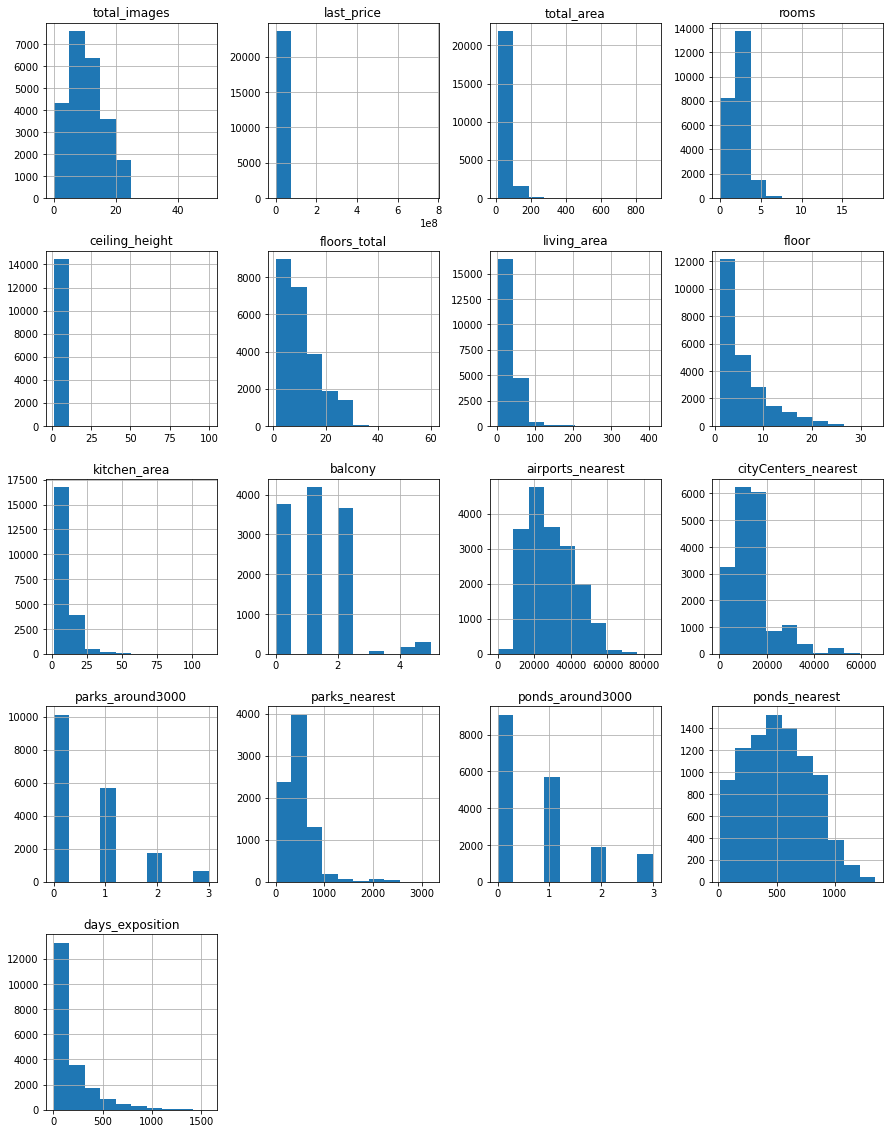

In [6]:
data.hist(figsize=(15, 20));

В первую очередь в глаза бросается очень странный внешний вид распределения показателя `last_price`, который отражает последнюю цену объявления - все значения на данном представлении собраны в одину шкалу, причём измерение шкалы асцисс в 1e8, т.е. 100 млн яляется единицей измерения шкалы абсцисс, это кажется очень много и мы можем предположить, что в списке объявлений наряду с прочими содержатся объявления о продаже очень дорогостоящей и элитной недвижимости.

## Предобработка данных

### Удаление пропусков

Первым этапом предобработки данных решим проблему пропуска данных.
Для начала однозначно определим в каких столбцах и в каком количестве присутствуют пропуски

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


#### Высота потолков

In [8]:
data['ceiling_height'].median()

2.65

Для определения пропущенных значений в поле `ceiling_height` достаточно уместно будет воспользоваться медианным значением данного параметра - 2.65 м, такая высота потолков характерна для большого количества жилой недвижимости.

In [9]:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

#### Количество этажей

Пропуски данных в поле `floors_total` заполним значениями из поля `floor`.

Если бы в данном датасете была бы информация о конкретном адресе объекта или хотя бы о районе месторасположения, то мы могли бы воспользоваться картографическими справочными системами для определения этажности объекта. В нашем же случае эта информация не включена в выгрузку, но мы можем смело утверждать, что общая этажность здания будет не меньше, чем этаж расположения объекта, этим и воспользуемся.

In [10]:
data['floors_total'].where(~data['floors_total'].isna(), data['floor'], inplace=True)

#### Жилая площадь

Для замены пропусков в поле `living_area` проверим есть ли в представленном наборе данных зависимость между жилой и полной площадью объекта недвижимости и насколько сильна эта связь.

Построим диаграмму рассеивания для визиульной оценки связи и её направления, а также посчитаем коэффициент корреляции.

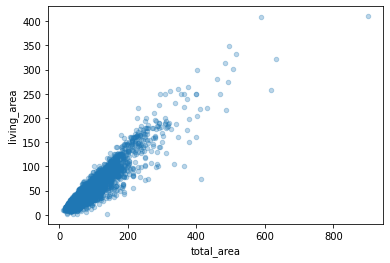

In [11]:
data.plot(x='total_area', y='living_area', kind='scatter', alpha=0.3);

In [12]:
data['living_area'].corr(data['total_area'])

0.9395373338721493

На диаграмме рассеивания чётко прослеживается наличие прямой связи между полной и дилой площадью квартиры.

Посчитанный коэффициент корреляции 0.93 подтверждает тесноту связи. 

Посчитаем коэффициент отношения жилой площади квартиры к полной для медианных значений.

In [13]:
living_area_coeff = data['living_area'].median()/data['total_area'].median()

In [14]:
data['living_area'].where(~data['living_area'].isna(), data['total_area'] * living_area_coeff, inplace=True)

#### Аппартаменты

Для столбца `is_appartment` заменим пропуски на False, т.к. в описании датасета было указано, что данное поле имеет булев тип данных. По смыслу же будем считать, что пропущенные данные в этом столбце означают, что объект недвижимости не является аппартаментами.

In [15]:
data['is_apartment'].fillna(False, inplace=True)

#### Количество балконов

Для столбца `balcony` будем считать, что пропуски были сделаны в тех местах, где нет балкона, таким образом заменим пропуски на 0.

In [16]:
data['balcony'].fillna(0, inplace=True)

#### Площадь кухни

Для заполнения пропусков в `kitchen_area` применим тот же метод, что и для заполения пропусков в `living_area`. Для начала посчитаем коэффициент корреляции между площадью кухни и общей площадью.

In [17]:
data['total_area'].corr(data['kitchen_area'])

0.6091211711198318

Рассчитанный коэффициент коррекляции показывает прямую взаимосвязь, однако, не такую сильную, как между общей и жилой площадями.

Попробуем добавить столбец `rest_area`, который будет показывать остаток от общей площади за вычетом жилой, и проверим какова связь между площадью кухни и прочей площадью квартиры.

In [18]:
data['rest_area'] = data['total_area'] - data['living_area']

In [19]:
data['rest_area'].corr(data['kitchen_area'])

0.7298348113210789

Коэффициент корреляции площади кухни и прочей площади квартиры получился почти 0.73, в любом случае эта связь сильнее, чем связь между площадью кухни и общей площадью, поэтому заполним пропуски в поле `kitchen_area` на основании коэффициента отношения площади кухни и прочей площади.

In [20]:
kitchen_area_coeff = data['kitchen_area'].median()/data['rest_area'].median()

In [21]:
data['kitchen_area'].where(~data['kitchen_area'].isna(), data['rest_area'] * kitchen_area_coeff, inplace=True)

После заполнения пропусков в `kitchen_area` удалим из набора данных рассчитанное ранее поле `rest_area` за ненадобностью.

In [22]:
data.drop(columns=['rest_area'], inplace=True)

#### Населенный пункт

Пропуски в поле `locality_name` заполнить не удастся.

В связи с тем, что у нас нет никакой информации о местонахождении этих объектов, целесообразно будет удалить эти строки из набора данных, тем более что они составляют всего 0.2 % от количества всех записей в датасете.

In [23]:
data.dropna(subset=['locality_name'], inplace=True)

In [24]:
data.reset_index(drop=True, inplace=True)

#### Прочие поля

Для заполнения пропусков в поле `parks_around3000` проверим, есть ли заполненные расстояния в поле `parks_nearest`. 

Если для всех записей расстояние не заполнено, то будем считать, что это не ошибка, а закономерность заполнения, которая говорит о том, что количество парков в радиусе 3 км равно 0.

In [25]:
data.query('parks_around3000.isna()')['parks_nearest'].unique()

array([nan])

Итак, мы видим, что наше предположение подтверждается, таким образом заменим пропуски в поле `parks_around3000` на 0.

In [26]:
data['parks_around3000'].fillna(0, inplace=True)

Аналогично проверим количество прудов в радиусе 3 км и расстояние до ближайшего пруда.

In [27]:
data.query('ponds_around3000.isna()')['ponds_nearest'].unique()

array([nan])

In [28]:
data['ponds_around3000'].fillna(0, inplace=True)

Пропуски в полях `parks_nearest` и `ponds_nearest` оставим незаполненными в связи с тем, что эти пропуски имеют практический смысл и означают, что на основании автоматического картографического исследования не удалось обнаружить парки и пруды поблизости от рассматриваемого объекта недвижимости, либо поиск был ограничен каким-то определенным радиусом.

Этот вывод подтверждается исследованием ниже, исходя из которого для строк с пропусками в рассматриваемых полях количество прудов и парков в радиусе ближайших 3 км во всех случаях равно 0.

In [29]:
data.query('ponds_nearest.isna()')['ponds_around3000'].value_counts()

0.00    14565
Name: ponds_around3000, dtype: int64

In [30]:
data.query('parks_nearest.isna()')['parks_around3000'].value_counts()

0.00    15586
Name: parks_around3000, dtype: int64

Исходя из аналогичной логики оставим пропуски в полях `airports_nearest` и `cityCenters_nearest`, предполагая, что поиск был ограничен каким-то определенным радиусом и в случае, если в установленном радиусе не найден целевой объект, то поле остаётся незаполненным. Таким образом, оставим пропуски в этих полях.

Пропущенные значения в колонке `days_exposition` оставим незаполненными, предполагая, что объявления с пропусками в этом поле ещё активны и не сняты с публикации.

**Вывод**: итак, мы обработали все пропуски в таблице, большую часть пропусков нам удалось заменить значениями, причём различными способами, исходя из контекста поля и пропуска. Мы удалили из таблицы записи, у которых в поле с наименованием населенного пункта были пропуски, это всего 0.2% от всего набора данных.
Пропуски в полях с картографическим данными мы оставили, исходя из логики, что эти пропуски означают, что в рассматриваемом автоматически радиусе просто не нашлось объектов, удалять же из набора более 20% данных кажется непростительной расточительностью. Также оставили пропуске в поле с количеством дней, которые объявление было активно.

### Изменение типов данных

Итак, выведем ещу раз информацию о таблице для определения необходимости замены типов данных.

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23650 non-null  float64
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23650 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Изменим типы данных с `float` на `int` в полях `floors_total`,`balcony`,`parks_around3000`,`ponds_around3000`, т.к. по смыслу данные поля должны иметь в качестве значений целые числа.

In [32]:
data[['floors_total','balcony','parks_around3000','ponds_around3000','last_price']] =\
data[['floors_total','balcony','parks_around3000','ponds_around3000','last_price']].astype('int64')

Тип даных в поле `first_day_exposition` приведём к дате.

In [33]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

### Обработка дубликатов

Изучим список названий населенных пунктов на предмет наличия неявных дубликатов.

In [34]:
list(data['locality_name'].sort_values().unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

In [35]:
len(list(data['locality_name'].sort_values().unique()))

364

Всего 364 различных наименования населенных пунктов.

Произвёдем следующие замены:
- заменим букву **'ё'** на букву **'е'**
- заменим **'городской поселок'** на **'поселок городского типа'**
- удалим словосочетание **'при железнодорожной '**

In [36]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок городского типа')
data['locality_name'] = data['locality_name'].str.replace('при железнодорожной ', '')

In [37]:
len(list(data['locality_name'].sort_values().unique()))

321

In [38]:
data.duplicated().sum()

0

**Вывод**:С помощью преобразований нам удалось сократить список названий населенных пунктов до 321 уникального значения, таким образом мы избавились от 43 неявных дубликатов. Дальнейшее преобразование , например до имен собственных, может быть излишне, т.к. могут существовать различные виды населенных пунктов с одинаковым наименованием.
Например, в Ленинградской области согласно данным Википедии существует деревня и поселок с наименованием Зимитицы и это разные населенные пункты.

Удостоверились, что в нашем наборе данных отсутствуют полные дубликаты строк.

### Обработка аномальных значений

#### Высота потолков

Посмотрим на описание данных в поле `ceiling_height` с помощью метода `describe`.

In [39]:
data['ceiling_height'].describe()

count   23650.00
mean        2.72
std         0.99
min         1.00
25%         2.60
50%         2.65
75%         2.70
max       100.00
Name: ceiling_height, dtype: float64

Итак, мы установили, что медианным значением высоты потолков является 2.65 м. Значения первой и третьей квартилей располагаются достаточно близко к медиане - 2.6 и 2.7 м соответственно, т.е. в 50 % квартир высота потолков колеблется между 2.6 и 2.7 м.

Минимальное значение выстоты потолков 1 м, максимальное - 100 м. Эти значения абсолютно точно являются выбросам.

Построим диаграмму размаха и гистограмму распределения значений для определения прочих выбросов данных.


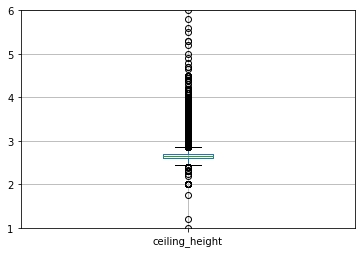

In [40]:
plt.ylim(1,6)
data[['ceiling_height']].boxplot();

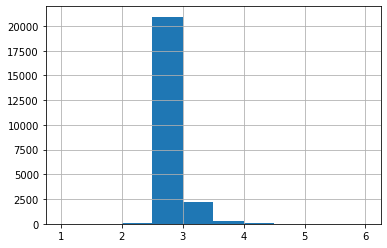

In [41]:
data['ceiling_height'].hist(range=(1,6));

На построенных графиках мы ясно видим, что значения меньше 2.5 м и больше 4 метров редки, поэтому руководствуясь логикой и здравым смыслом будем считать все значения выходящие за указанный диапазон выбросами подлежащими замене на крайние значения обозначенного диапазона.

In [42]:
data['ceiling_height'].where(data['ceiling_height'] > 2.5, 2.5, inplace=True)
data['ceiling_height'].where(data['ceiling_height'] < 4, 4, inplace=True)

#### Соотношение суммы жилой и кухонной площади и общей площади объекта

Проверим, чтобы в сумме площадь жилой и кухонной площади не превышали 90 % от общей площади с учётом того, что к общей площади также относятся площади коридоров, санузлов, кладовок, балконов и т.д.

In [43]:
data[data['living_area']+data['kitchen_area']>data['total_area']*0.9]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
41,16,7900000,74.00,2016-05-04,3,2.65,14,59.00,8,False,...,12.00,5,Санкт-Петербург,37715.00,12612.00,1,725.00,1,759.00,179.00
171,6,3800000,49.00,2019-02-22,2,2.50,9,38.00,8,False,...,10.00,1,поселок Шушары,18471.00,24272.00,0,NaN,0,NaN,11.00
184,7,2600000,30.20,2018-02-14,1,2.65,9,26.10,5,False,...,6.20,0,Санкт-Петербург,13952.00,15031.00,0,NaN,1,824.00,12.00
220,8,3890000,37.00,2018-07-09,1,2.50,25,28.00,6,False,...,9.00,0,Санкт-Петербург,25408.00,16166.00,0,NaN,0,NaN,28.00
319,19,4850000,59.70,2015-03-19,3,2.50,5,47.40,4,False,...,6.40,1,Санкт-Петербург,43095.00,15599.00,0,NaN,0,NaN,974.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23167,15,10150000,114.00,2015-01-21,4,2.65,5,90.20,4,False,...,16.00,0,Санкт-Петербург,26259.00,4961.00,0,NaN,2,838.00,1052.00
23248,10,1850000,48.20,2019-03-13,2,2.65,5,42.20,2,False,...,6.00,1,Высоцк,NaN,NaN,0,NaN,0,NaN,45.00
23279,12,4299000,54.00,2016-11-25,2,2.65,14,40.00,8,False,...,10.00,0,Колпино,25612.00,31399.00,0,NaN,0,NaN,343.00
23472,13,8500000,65.00,2018-11-01,2,2.65,4,44.00,2,False,...,15.30,0,Санкт-Петербург,22276.00,3996.00,1,627.00,0,NaN,NaN


В 545 случаях сумма жилой и кухонной площади превышает 90% общей площади, это аномалии. Для того, чтобы их устранить воспользуемся рассчитанными ранее коэфиициентами жилой и кухонной площади.

In [44]:
data['living_area'].where(data['living_area']+data['kitchen_area']<=
                              0.9 * data['total_area'],
                          data['total_area'] * living_area_coeff, inplace=True)

In [45]:
data['kitchen_area'].where(data['living_area']+data['kitchen_area']<=
                              0.9 * data['total_area'],
                          (data['total_area'] - data['living_area']) * kitchen_area_coeff, inplace=True)

Проверим, что аномалии действительно устранены.

In [46]:
data[data['living_area']+data['kitchen_area']>data['total_area']*0.9]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Срез по условию более не возвращает записей, следовательно, аномалии исключены.

#### Количество комнат

Проверим на наличие аномалий поле `rooms`. Для этого выведем список уникальных значений.

In [47]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

В глаза бросается значение комнат 0. Преположим, что 0 количество комнат указывалось для квартир-студий. Построим сводную таблицу, в которой отобразим распределение объектов по количеству комнат и распределение студий по количеству комнат.

In [48]:
objects_by_rooms = (data
                   .pivot_table(index='rooms',
                                values='studio',
                                aggfunc={'sum','count'}))
objects_by_rooms.columns = ['count_objects', 'count_studio']
objects_by_rooms

,count_objects,count_studio
rooms,,
0,197,138
1,8036,11
2,7924,0
3,5797,0
4,1175,0
5,326,0
6,105,0
7,59,0
8,12,0


Наша гипотеза о том, что количество комнат 0 связано с тем, что квартира является студией подтверждается, в основном все квартиры с 0 количеством комнат являются студиями.

Однако, однокомнатная студия по сути своей является однокомнатной квартирой, а указание количества комнат 0 является ошибкой заполнения данных об объявлении. 
Для того, чтобы в этом убедиться в этом ещё раз и заодно проверить не являются ли аномалиями большие количества комнат построим сводную таблицу распределения медианной жилой площади по количеству комнат, в которой также отобразим средний размер комнаты, посчитанный на основании медианного значения жилой площади.

In [49]:
objects_area_by_rooms = (data
                   .pivot_table(index='rooms',
                                values='living_area',
                                aggfunc={'median','count'})).reset_index()
objects_area_by_rooms.columns = ['rooms', 'count_objects', 'median_living_area']
objects_area_by_rooms['mean_room_living_area']=objects_area_by_rooms['median_living_area']/objects_area_by_rooms['rooms']
objects_area_by_rooms

,rooms,count_objects,median_living_area,mean_room_living_area
0,0,197,17.60,inf
1,1,8036,17.80,17.80
2,2,7924,30.40,15.20
3,3,5797,44.42,14.81
4,4,1175,63.31,15.83
5,5,326,91.00,18.20
6,6,105,118.40,19.73
7,7,59,147.20,21.03
8,8,12,160.00,20.00
9,9,8,169.90,18.88


Итак, медианный размер жилой площади в квартирах с 0 и 1 комнатами практически совпадает, таким образом, мы ещё раз убеждаемся в том, что 0 является аномалией и мы можем заменить его на 1.

In [50]:
data['rooms'].where(data['rooms'] != 0, 1, inplace=True)

Средняя жилая площадь комнат в квартирах с разным количеством комнат не меньше 11.25, что вполне имеет место быть, например комната размером 4 м на 2.8 м может быть спальней. Объекты с большим количеством комнат не являются выбросами.

#### Исследование наличия аномалий в цене

Для поиска аномалий в поле с ценой попытаемся для начала посмотреть крайние 10 записей сверху и снизу в отсортированном срезе таблицы по возрастанию цены.

In [51]:
data[['last_price','locality_name','total_area']].sort_values(by='last_price').head(10)

,last_price,locality_name,total_area
8778,12190,Санкт-Петербург,109.00
17426,430000,Сланцы,30.40
14886,430000,поселок станции Свирь,54.00
16247,440000,деревня Старополье,40.00
17645,450000,деревня Ям-Тесово,36.50
9565,450000,деревня Старополье,43.40
5689,450000,поселок городского типа Будогощь,42.00
16192,450000,деревня Вахнова Кара,38.50
23435,470000,Сланцы,44.50
18834,470000,деревня Выскатка,41.00


Первый объект объект явно выбивается. Посмотрим описание среза цен для квартир в Санкт-Петербурге площадью от 100 до 110 м2.

In [52]:
data.query('locality_name == "Санкт-Петербург" and 100<total_area<110')['last_price'].describe()

count        367.00
mean    13553205.56
std      5632655.27
min        12190.00
25%      9945000.00
50%     12508697.00
75%     14895000.00
max     48000000.00
Name: last_price, dtype: float64

Судя по медиане в 12,509 млн рублей можно сказать, что в объявлении с ценой 12190 допущена ошибка, цена скорее всего указана в тысячах рублей. Для того, чтобы исправить эту ошибку умножим цену строки на 1000, тем самым приведем значение к сумме в рублях.

In [53]:
data.loc[8778, 'last_price'] = data.loc[8778, 'last_price'] * 1000

Теперь посмотрим на нижние 10 записей.

In [54]:
data[['last_price','locality_name','total_area']].sort_values(by='last_price').tail(10)

,last_price,locality_name,total_area
8885,190870000,Санкт-Петербург,268.00
5883,230000000,Санкт-Петербург,500.00
13726,240000000,Санкт-Петербург,410.00
16434,245000000,Санкт-Петербург,285.70
22784,289238400,Санкт-Петербург,187.50
15626,300000000,Санкт-Петербург,618.00
1435,330000000,Санкт-Петербург,190.00
14681,401300000,Санкт-Петербург,401.00
19505,420000000,Санкт-Петербург,900.00
12950,763000000,Санкт-Петербург,400.00


Три самых дорогих объекта стоят от 400 до 763 миллионов рублей. Это квартиры с большими площадями, располагающиеся в Санкт-Петербурге.

Сформулируем гипотезу, что квартира не может стоить условно больше 100 млн рублей и и цены более 100 млн рублей являются аномалиями. 

Для оценки адекватности стоимости таких объектов прибегнем к наблюдению - проверим, есть ли сейчас сейчас в базе данных [Яндекс.Неджимости](https://realty.yandex.ru/sankt-peterburg/kupit/kvartira/karta/?bottomLatitude=59.927079&leftLongitude=30.172626&priceMin=400000000&rightLongitude=30.447595&topLatitude=59.97977&zoom=13.2)  подобные объявления.

Такие объекты недвижимости, действительно, встречаются, их немного, но они есть и относятся к категории элитной недвижимости, это как правило объекты с большими площадями, дизайнерским ремонтом, мебелью в элитном доме в престижном районе.

Таким образом, гипотеза о том, что стоимость объекта не может составлять более 100 млн рублей отвергается, данные значимы.

**Вывод**: на данном шаге мы приняли решение об ограничении высоты потолков с 2.5 до 4 м, все значения выпадающие за эти диапазоны были помечены как аномальные и заменены на величину границ. Также проверили, чтобы сумма жилой и кухонной площади не составляли более 90 % от общей площади, с помощью коэффициентов площадей определенных в шаге Удаление пропусков, переопределили получившиеся аномальными значения. В поле с количеством комнат обратили внимание на количество комнат 0, сочли это аномалией и заменили на 1. Также была обнаружена и исправлена одна аномалия в поле с ценой.

На наш взгляд природа этих аномалий заключается в ошибочном заполнении данных.

## Добавление новых столбцов

Для проведения дальнейшего исследовательского анализа рассчитаем и добавим в таблицу новые столбцы:
* **цена за квадратный метр, рублей**

In [55]:
data['sqrt_meter_price'] = data['last_price'] / data['total_area']

* **день недели публикации объявления**

In [56]:
data['fde_weekday'] = data['first_day_exposition'].dt.dayofweek

* **месяц публикации объявления**

In [57]:
data['fde_month'] = data['first_day_exposition'].dt.month

* **год публикации объявления**

In [58]:
data['fde_year'] = data['first_day_exposition'].dt.year

In [59]:
data['fde_year_month'] = np.array(data['first_day_exposition'], dtype=('datetime64[M]'))

In [101]:
data['first_day_exposition'] = data['first_day_exposition'].dt.date

In [102]:
data['first_day_exposition'].astype('datetime64[M]')

0       2019-03-01
1       2018-12-01
2       2015-08-01
3       2015-07-01
4       2018-06-01
           ...    
23645   2017-03-01
23646   2018-01-01
23647   2018-02-01
23648   2017-03-01
23649   2017-07-01
Name: first_day_exposition, Length: 23650, dtype: datetime64[ns]

* **тип этажа квартиры**

In [60]:
def categorize_floor(floor, floors_total):
    try:
        if floors_total > 1:
            if floor == 1:
                return 'первый'
            elif floor == floors_total:
                return 'последний'
            else:
                return 'другой'
        else:
            return 'другой'
    except:
        pass

In [61]:
data['floor_type'] = data.apply(lambda x: categorize_floor(x.floor, x.floors_total), axis=1)

* **расстояние до центра города в километрах**

In [62]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] // 1000

## Исследовательский анализ данных

### Исследование отдельных мер

In [63]:
data['total_area'].describe()

count   23650.00
mean       60.33
std        35.66
min        12.00
25%        40.00
50%        52.00
75%        69.70
max       900.00
Name: total_area, dtype: float64

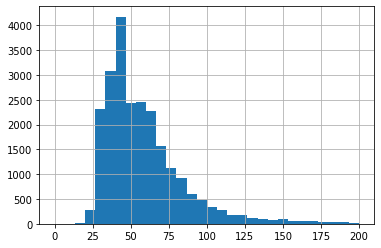

In [64]:
data['total_area'].hist(bins=30,range=(0,200));

Мы построили гистограмму распределения квартир из набора данных по общей площади.
Для того, чтобы гистограмма была более наглядна ограничили диапазон значений от 0 до 200 м2, в этот диапазон попадает большинство представленных значений, т.к. граница третьей квартили 69.7 м2.

Из графика мы видим, что распределение тяготеет к нормальному с более плавной левой частью и резкой правой.

Это говорит о том, что наибольшее количество объявлений приходится на сравнительно небольшие по площади объекты, от 25 до 50 м2.

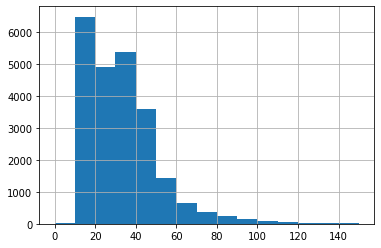

In [65]:
data['living_area'].hist(bins=15,range=(0,150));

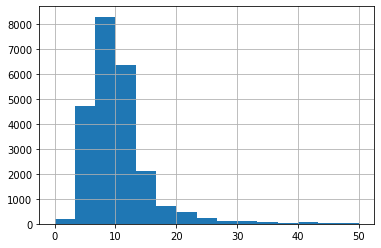

In [66]:
data['kitchen_area'].hist(bins=15,range=(0,50));

Гистограммы распределения `living_area` и `kitchen_area` по форме близки к гистограмме распределения `total_area`.

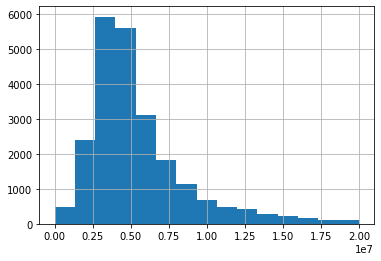

In [67]:
data['last_price'].hist(bins=15,range=(0,2*10**7));

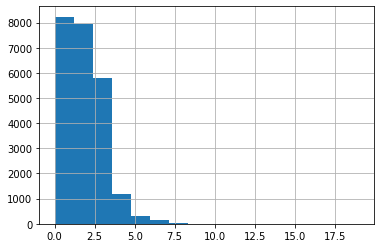

In [68]:
data['rooms'].hist(bins=16,range=(0,19));

Глядя на гистограмму количества комнат можно говорить о том, что наиболее часто встречающиеся в продаже объекты это 1-2-3 комнатные квартиры по убыванию популярности предложения. Можно попытаться объяснить это тем, что 1-2 комнатные квартиры наиболее доступны в цене и зачастую люди по прошествии времени стараются улучшить свои жилищные условия, например, переехать из двухкомнатной квартиры в трёхкомнатную. Квартиры от 4 комнат и выше не так распространены на рынке недвижимости, это уже более дорогое и комфортное жилье, которое не каждому по карману.

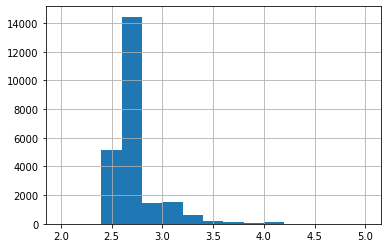

In [69]:
data['ceiling_height'].hist(bins=15,range=(2,5));

Гисторамма высоты потолков ожидаемо иммет пик около 2.6-2.7 м, это наиболее распространенная величина для жилых помещений, ранее мы выяснили, что значение медианы для этой характеристики 2.65 м.

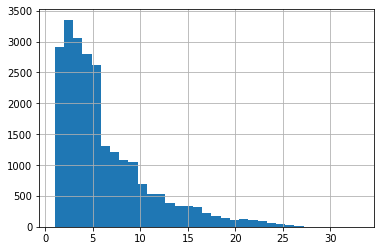

In [70]:
data['floor'].hist(bins=33);

По гистограмме этажности расположения квартиры можно отметить, что большая часть распределения приходится на квартиры, которые располагаются с 1 по 5 этаж. Это в том числе достаточно хорошо объясняется видом гистограммы общей этажности домов, в которых продавались квартиры - самый большой пик приходится на 5-этажные дома, дальше выделяются 9-этажки, 16-этажки и 25-этажки. Данный факт объясняется особенностями строительства жилых домов в России. Дома этажностью 5 и 9 этажей являются типовыми решениями для многоквартирного строительства ещё со времен СССП, по всей видимости, дома этажностью 16 и 25 этажей являются типовыми решениями последних лет.

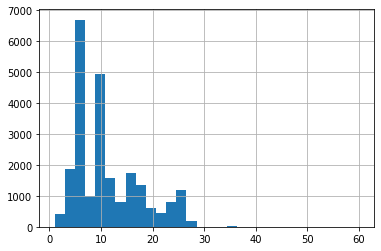

In [71]:
data['floors_total'].hist(bins=30);

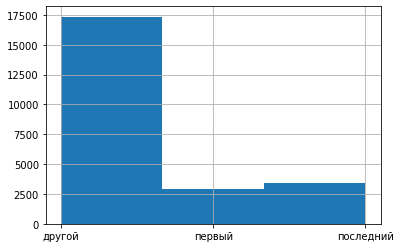

In [72]:
data['floor_type'].hist(bins=3);

Обратим также внимание, что самое большое количество предложений квартир приходится на средние этажи. Это можно легко объяснить тем, что например в 5-ти этажном доме один первый этаж, один последний этаж и 3 средних этажа, т.е. потенциальное предложение квартир на средних этажах в этом примере при прочих может быть в 3 раза больше, чем предложение квартир, например, на первом этаже.

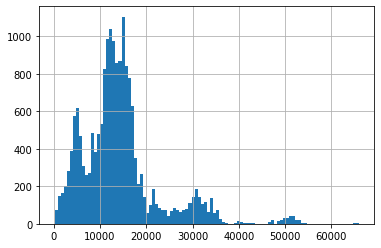

In [73]:
data['cityCenters_nearest'].hist(bins=100);

На гистограмме удаленности объекта от центра города можно выделить два выдающихся интервала с наибольшим количеством вхождений:
- около 5 км
- от 10 до 18 км

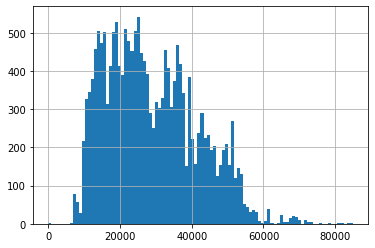

In [74]:
data['airports_nearest'].hist(bins=100);

На гистограмме удаленности объекта до ближайшего аэропорта основное распределение имеющихся в нашем распоряжении данных приходится на расстояние от 10 до 30 км.

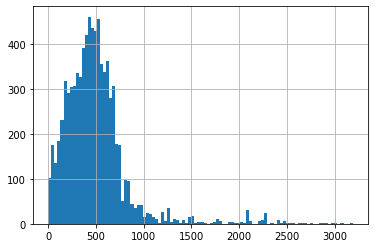

In [75]:
data['parks_nearest'].hist(bins=100);

По данным о близости парков можно сделать вывод, что для квартир, для которых заполнен этот параметр, в большинстве своём ближайший парк располагается не более, чем в 1 км, т.е. фактически в пешей доступности.

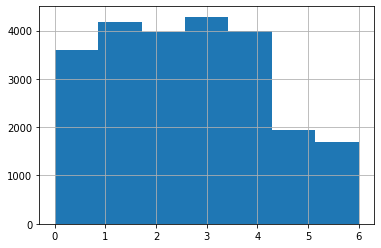

In [76]:
data['fde_weekday'].hist(bins=7);

По распределению количества размещенных объявлений по дням недели можно сделать однозначный вывод, что наиболее активно объявления размещаются в рабочие дни недели. Можно предположить, что большая часть объявлений о продаже квартир размещается агентствами недвижимости и риэлторами, которые работают в будние и стараются отдыхать в выходные дни.

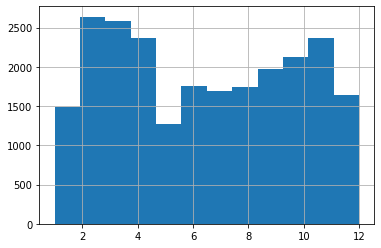

In [77]:
data['fde_month'].hist(bins=12);

По распределению количества объявлений по месяцам можно также предположить, что много объявлений размещается агентствами и риэлторами, т.к. провал в мае вполне может быть связан с тем, что в начале мая ежегодные майские праздники, в которые офисные сотрудники отдыхают.

Также скорее всего здесь накладывается и общий сезон, в декабре, как правило, люди заняты подготовкой к праздникам и с меньшей уверенностью будут готовы затевать продажу квартиры и возможный переезд под Новый год. Январь традиционно начинается с 1-1.5 недель общих каникул, как правило, это месяц общего спада деловой активности, которая начинает просыпаться в феврале-марте.

Некоторый спад в мае и дальнейшее плато в уровне размещения объявлений возможно также можно объяснить тем, что приходит тепло, начинается пора отпусков, кто-то уезжает в отпуск, кто-то переезжает на лето за город, то есть опять же происходит спад деловой активности, после чего осенью начинается рост.

### Анализ скорости продажи квартир

In [78]:
data['days_exposition'].describe()

count   20470.00
mean      180.75
std       219.78
min         1.00
25%        45.00
50%        95.00
75%       231.00
max      1580.00
Name: days_exposition, dtype: float64

Средняя скорость продажи квартиры составляется полгода, медианное же значение в 2 раза меньше - 3 месяца.

Можно сказать, что если квартира продалась быстрее, чем за 1.5 месяца(первая квартиль), то это можно считать быстрой продажей, если же квартира продавалась более 8 месяцев (чуть более значения третьей квартили), то это можно считать долгой продажей. Норма - от 1,5 до 8 месяцев.

Для построения более детальной гистограммы распределения определим нижние и верхние границы отображения на основании плеч диаграммы размаха.

In [79]:
IQR = (data['days_exposition'].describe()['75%'] 
       - data['days_exposition'].describe()['25%']) * 1.5
low_bound = 0 if (data['days_exposition'].describe()['25%']-IQR) < 0 \
                else (data['days_exposition'].describe()['25%']-IQR)
upper_bound = data['days_exposition'].describe()['75%']+IQR

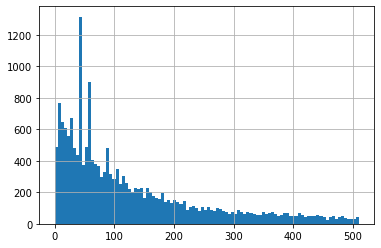

In [80]:
data['days_exposition'].hist(bins=100,range=(low_bound,upper_bound));

Распределение проданных квартир по количеству дней продажи говорит о том, что чем больше длительность, тем меньше количество продаваемых квартир. Отдельно хотелось бы обратить внимание на пики, которые выбиваются из общей формы гистограммы.

Для этого сделаем срез первых 5 значений по количеству проданных квартир в разбивке по дням продажи.

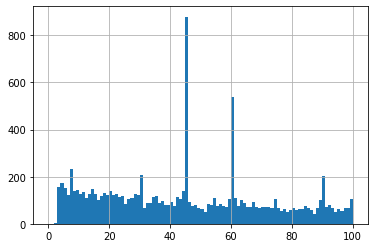

In [99]:
data['days_exposition'].hist(bins=100,range=(0,100));

In [81]:
data.groupby('days_exposition')['days_exposition'].count().sort_values(ascending=False).head(10)

days_exposition
45.00    879
60.00    538
7.00     234
30.00    208
90.00    203
4.00     174
3.00     158
5.00     152
14.00    148
9.00     142
Name: days_exposition, dtype: int64

Количества дней продажи, на которые приходится наибольшее количество проданных квартир, подозрительно напоминает некие стандартные сроки размещения объявлений: неделя, месяц, полтора, два, три месяца.

Остаётся только надеяться, что объекты действительно были проданы в течение этих периодов, а не получилось так, что объявления просто автоматически закрылись по истечении срока размещения объявления.

### Выявление факторов, влияющих на стоимость объекта

Пострим матрицу коэффициентов корреляции и сделаем срез по столбцу с ценой объекта.

In [82]:
data.corr()['last_price'].sort_values(ascending=False)

last_price                1.00
sqrt_meter_price          0.74
total_area                0.65
living_area               0.59
kitchen_area              0.51
rooms                     0.37
ceiling_height            0.28
ponds_around3000          0.21
parks_around3000          0.20
total_images              0.10
days_exposition           0.08
is_apartment              0.03
floor                     0.03
balcony                   0.01
fde_month                 0.00
fde_weekday               0.00
floors_total             -0.01
open_plan                -0.01
parks_nearest            -0.02
studio                   -0.03
airports_nearest         -0.03
fde_year                 -0.04
ponds_nearest            -0.09
cityCenters_nearest      -0.21
cityCenters_nearest_km   -0.21
Name: last_price, dtype: float64

По матрице коээфициентов коррекляции можно сделать следующие выводы:
* если не учитывать связь цены объекта и цены за квадратный метр, т.к. одна выведена из другой, то самая сильная положительная связь характерна для цены квартиры и **общей площади**. Природа этой взаимосвязи понятна и логична, чем больше площадь - тем больше цена;

* далее по силе связи идут характеристики **жилой площади и площади кухни**, это в том числе объясняется тем, что эти показатели сами имеют тесную положительную связь с первой по силе характеристикой - общей площадью помещения;

* также рассчиталась слабая положительная связь цены с такими показателями как **количество комнат, высота потолков, количество прудов и парков в радиусе 3 км**, но данные связи как минимум почти в 2 раза слабее зависимости цены квартиры от её площади;

* также стоит отметить наличие слабой отрицательной связи с показателями **расстояния от объекта до центра города**, как правило действительно, при прочих равных из двух равноценных объектов разноудаленных от центра города, дороже будет стоить тот объект, расстояние от которого до центра города меньше, и наоборот, чем больше расстояние до центра - тем меньше цена. Однако, данная связь также не достаточно сильная и в 3 раза слабее зависимости цены от общей площади.



Для подтверждения сделанных выше выводов на основании матрицы коэффициентов корреляции о взаимосвязи цены на квартиру с основными показателями, а также с целью визуализации этих взаимосвязей, построим несколько графиков, которые покажут зависимость цены от интересующих показателей.

#### График зависимости `last_price` от `total_area`.

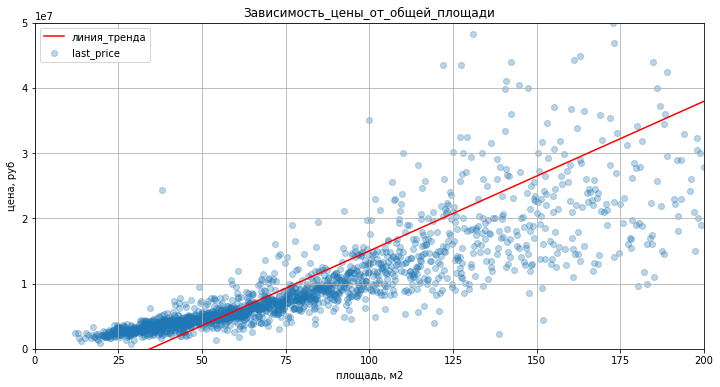

In [121]:
price_by_total_area = data.pivot_table(index='total_area', values='last_price').reset_index()
z = np.polyfit(price_by_total_area['total_area'],price_by_total_area['last_price'], 1)
p = np.poly1d(z)
plt.figure(figsize=(12,6))
plt.scatter(price_by_total_area['total_area'],price_by_total_area['last_price'],label='last_price',alpha=0.3)
plt.plot(price_by_total_area['total_area'],p(price_by_total_area['total_area']),label='линия_тренда',color='r') 
plt.title('Зависимость_цены_от_общей_площади')
plt.xlabel('площадь, м2')
plt.ylabel('цена, руб')
plt.ylim(0, 0.5 * 10 **8)
plt.xlim(0,200)
plt.legend()
plt.grid()

#### График зависимости `last_price` от `living_area`.

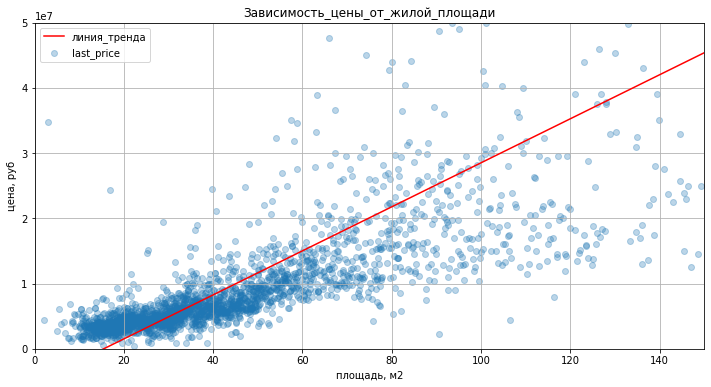

In [84]:
price_by_living_area = data.pivot_table(index='living_area', values='last_price').reset_index()
z = np.polyfit(price_by_living_area['living_area'],price_by_living_area['last_price'], 1)
p = np.poly1d(z)
plt.figure(figsize=(12,6))
plt.scatter(price_by_living_area['living_area'],price_by_living_area['last_price'],label='last_price',alpha=0.3)
plt.plot(price_by_living_area['living_area'],p(price_by_living_area['living_area']),label='линия_тренда',color='r') 
plt.title('Зависимость_цены_от_жилой_площади')
plt.xlabel('площадь, м2')
plt.ylabel('цена, руб')
plt.ylim(0, 0.5 * 10 **8)
plt.xlim(0,150)
plt.legend()
plt.grid()

#### График зависимости `last_price` от `kitchen_area`.

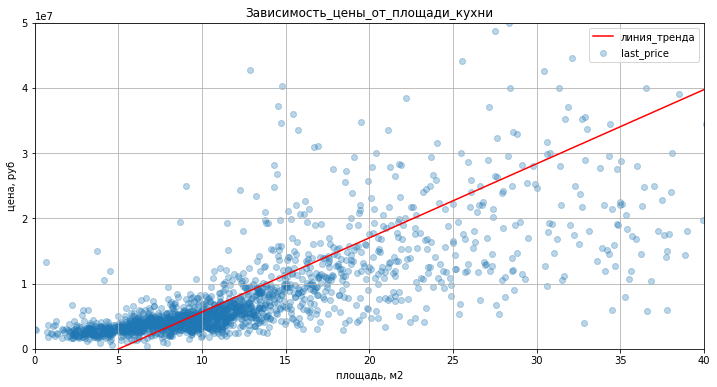

In [85]:
price_by_kitchen_area = data.pivot_table(index='kitchen_area', values='last_price').reset_index()
z = np.polyfit(price_by_kitchen_area['kitchen_area'],price_by_kitchen_area['last_price'], 1)
p = np.poly1d(z)
plt.figure(figsize=(12,6))
plt.scatter(price_by_kitchen_area['kitchen_area'],price_by_kitchen_area['last_price'],label='last_price',alpha=0.3)
plt.plot(price_by_kitchen_area['kitchen_area'],p(price_by_kitchen_area['kitchen_area']),label='линия_тренда',color='r') 
plt.title('Зависимость_цены_от_площади_кухни')
plt.xlabel('площадь, м2')
plt.ylabel('цена, руб')
plt.ylim(0, 0.5 * 10 **8)
plt.xlim(0,40)
plt.legend()
plt.grid()

Для визуалиции зависимости между ценой и тремя показателями площади квартиры мы построили 3 диаграммы рассеивания.
Для наглядности на каждую диаграмму была добавлена линия тренда, которая показывает общий вид линейной зависимости между показателями, а также для каждого графика были выбраны свои диапазоны отображаения, чтобы максимально передать смысл визуализации.

Итак, как было установлено ранее между ценой и параметрами площадей существует сильная положительная связь, самая сильная связь была рассчитана между ценой и общей площадью, но она всего в 1.1 раза сильнее, чем связь с жилой площадью, которая в свою очередь всего на 15% сильнее связи с площадью кухни.

На графиках наблюдается, что до определенного значения площади связь достаточно сильна, облако рассеивания плотное, далее же кучность данных снижается, разброс увеличивается. Такой вид графика вполне соответствует значениям коэффициентов корреляции от 0.51 до 0.65.

Данное явление можно попытаться обосновать тем, что с увеличением площади объекта спрос становится не таким однородным, а также значительное влияние могут начинать оказывать прочие факторы, например, местоположение объекта, наличие инфраструктуры, ремонт, его уровень и качество, наличие мебели и пр.

#### График зависимости `last_price` от `rooms`.

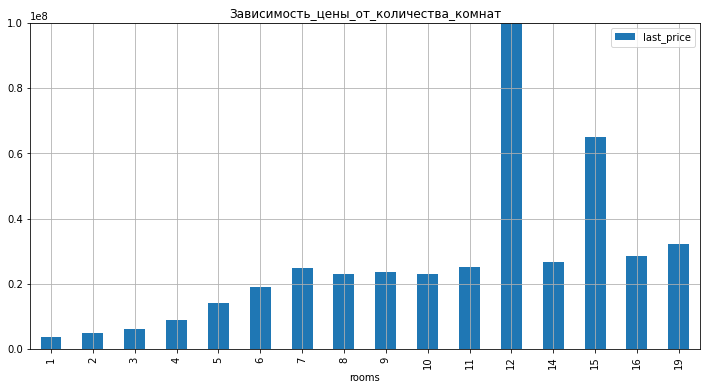

In [86]:
(data.pivot_table(index='rooms', values='last_price', aggfunc='median')
         .plot(kind='bar', title='Зависимость_цены_от_количества_комнат',
               figsize=(12,6), grid=True, ylim=(0, 10**8)
              )
);

Для визуализации зависимости цены от количества комнат в квартире построили столбчатую диаграмму медианного значения цены по количеству комнат.

На графике видно, что медианная цена последовательно растёт до 7 комнат, после изменения цены не имеют явновыраженных тенденций.

#### График зависимости `last_price` от `floor_type`.

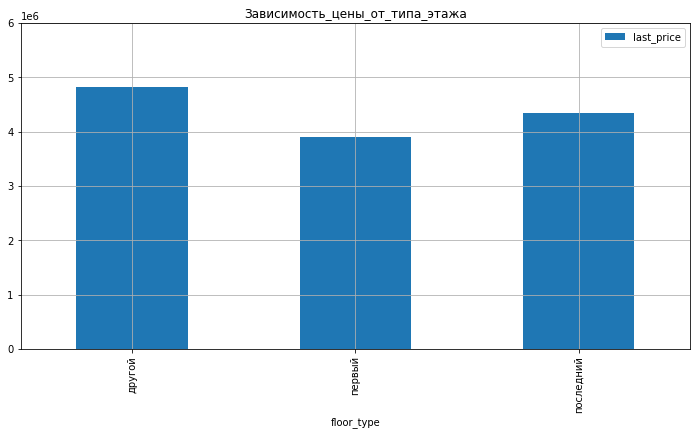

In [87]:
(data.pivot_table(index='floor_type', values='last_price', aggfunc='median')
         .plot(kind='bar', title='Зависимость_цены_от_типа_этажа',
               figsize=(12,6), grid=True, ylim=(0,  0.6 * 10**7)
              )
);

На столбчатой диаграмме выше мы изобразили медианное значение цены для каждого типов этажей.

Самая низкая медианная цена характерна для первого этажа, как правило на первых этажах квартиры действительно стоят несколько дешевле, т.к. у квартиры на первом этаже есть ряд потенциальных недостатков, соседи сверху могут затопить, с подвала могут полезть тараканы и прочая живность, полы могут быть холодными, нет балкона, вероятность грабежа выше, т.к. окна находятся низко.
Следующая по возрастанию медианная цена для последнего этажа, а самые дорогие квартиры на прочих этажах.
Данная ситуация соответствует действительности, последний этаж менее популярен, тем более в высотных домах, где, например, лифт может часто ломаться, а подниматься, например, 16 этажей пешком не очень привлекательно.

#### График зависимости `last_price` от даты размещения.

Для оценки зависимости цены от даты размещения построим 3 столбчатых диаграммы для года размещения объявления, месяца и дня недели.

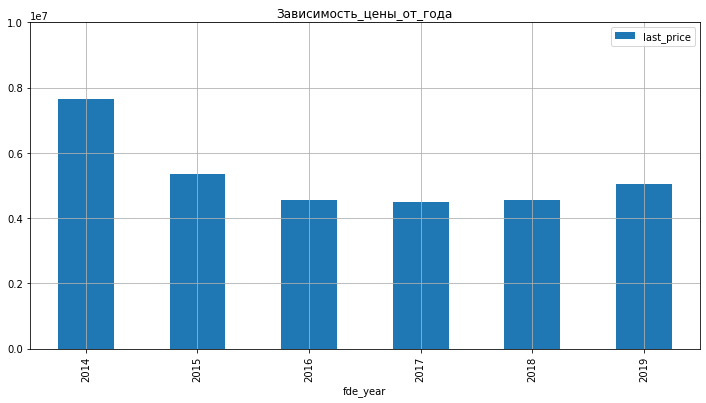

In [88]:
(data.pivot_table(index='fde_year', values='last_price', aggfunc='median')
         .plot(kind='bar', title='Зависимость_цены_от_года',
               figsize=(12,6), grid=True, ylim=(0,  10**7)
              )
);

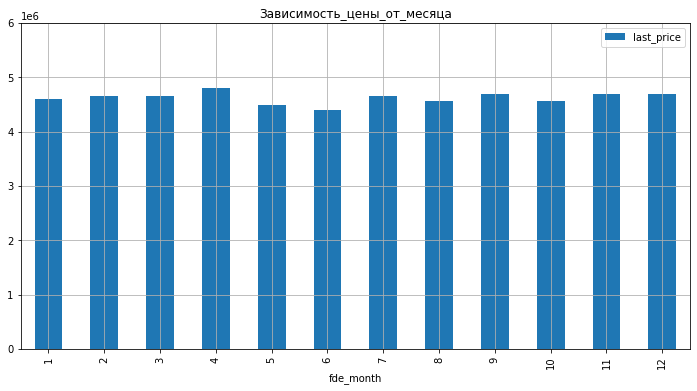

In [89]:
(data.pivot_table(index='fde_month', values='last_price', aggfunc='median')
         .plot(kind='bar', title='Зависимость_цены_от_месяца',
               figsize=(12,6), grid=True, ylim=(0,  0.6 * 10**7)
              )
);

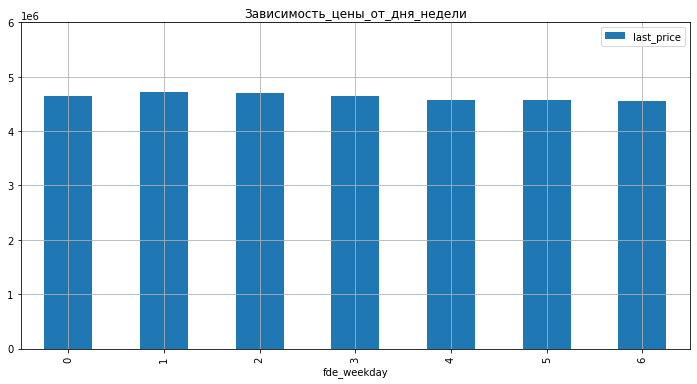

In [90]:
(data.pivot_table(index='fde_weekday', values='last_price', aggfunc='median')
         .plot(kind='bar', title='Зависимость_цены_от_дня_недели',
               figsize=(12,6), grid=True, ylim=(0,  0.6 * 10**7)
              )
);

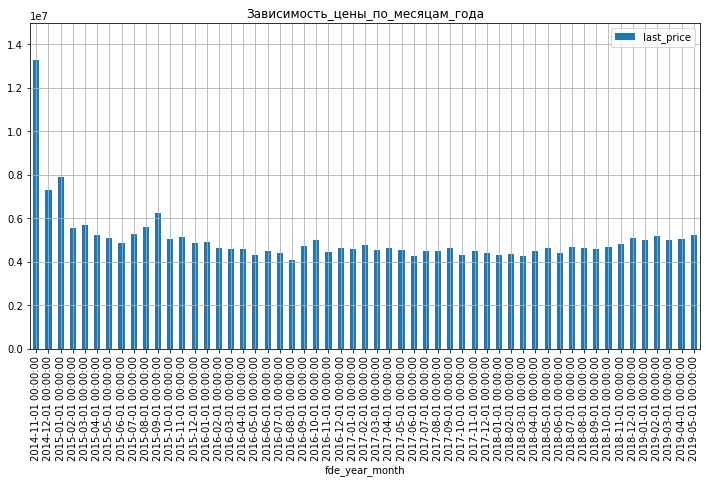

In [91]:
(data.pivot_table(index='fde_year_month', values='last_price', aggfunc='median')
         .plot(kind='bar', title='Зависимость_цены_по_месяцам_года',
               figsize=(12,6), grid=True, ylim=(0,  1.5 * 10**7)
              )
);

Выявить какие-то закономерности на графиках для месяца размещения и дня недели не удалось, все значения примерно равны, небольшие отклонения от столбца к столбцу не имеют каких-то ярко выраженных тенденций.

Интереснее выглядит график медианной цены объявления по году размещения. В 2014 году медианная цена была самая высокая, она резко упала в 2015 году и продолжила падение в 2016, далее в 2016-2018 годах цены были примерно на одном уровне, т.е. вышли на плато, в 2019 году вновь начался рост.

Данное явление скорее всего имеет экономико-политическое обоснование, т.к. в 2014 произошёл политический кризис на Украине, который в силу прочих некоторых политических и экономических событий повлёк экономический кризис в России, к концу года курсы доллара и евро выросли в 2 раза, вполне возможно, что в тот нестабильный период цены на недвижимость взлетели.

А далее экономическая ситуация начала стабилизироваться, Россия начала адаптироваться под введенные санкции, ожидания полного краха экономики не оправдались и цены начали снижаться.

Рост медианной цены в 2019 году не такой большой и мог быть обусловлен элементарной инфляцией.

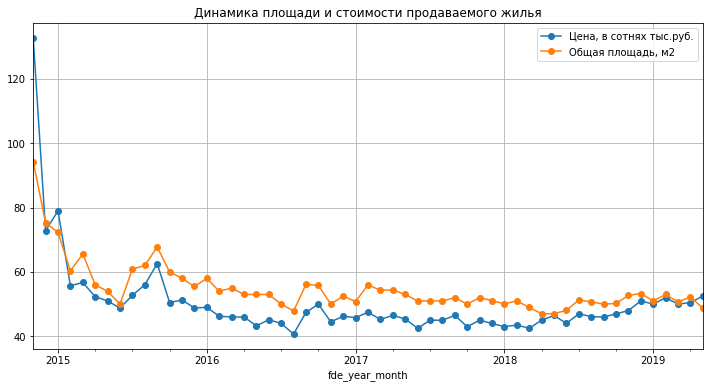

In [92]:
price_and_area_by_month = data.pivot_table(index='fde_year_month', values=['last_price','total_area'], aggfunc='median')
price_and_area_by_month['last_price'] = price_and_area_by_month['last_price'] / 100000
price_and_area_by_month.rename(columns={'last_price': 'Цена, в сотнях тыс.руб.', 
                                        'total_area': 'Общая площадь, м2'},
                               inplace=True)
price_and_area_by_month.plot(kind='line', 
                             title='Динамика площади и стоимости продаваемого жилья',
                             style='-o', figsize=(12,6), grid=True);

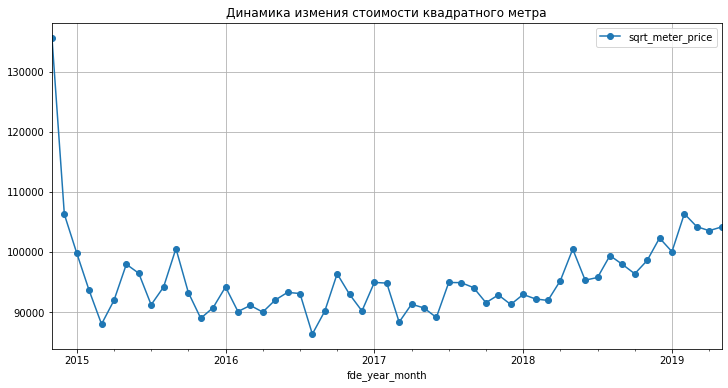

In [93]:
data.pivot_table(index='fde_year_month', values=['sqrt_meter_price'], aggfunc='median').plot(kind='line', 
                             title='Динамика измения стоимости квадратного метра',
                             style='-o', figsize=(12,6), grid=True);

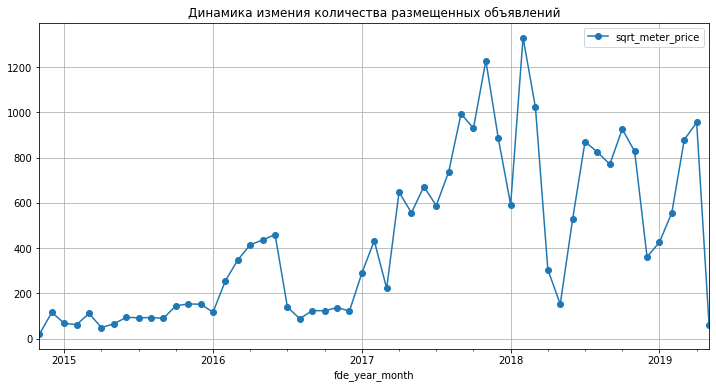

In [94]:
data.pivot_table(index='fde_year_month', values=['sqrt_meter_price'], aggfunc='count').plot(kind='line', 
                             title='Динамика измения количества размещенных объявлений',
                             style='-o', figsize=(12,6), grid=True);

In [95]:
data.query('fde_year==2014 and fde_month==12')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,sqrt_meter_price,fde_weekday,fde_month,fde_year,fde_year_month,floor_type,cityCenters_nearest_km
98,11,11700000,80.00,2014-12-10,3,2.65,5,55.10,3,False,...,0,NaN,831.00,146250.00,2,12,2014,2014-12-01,другой,8.00
260,8,17250000,102.40,2014-12-09,3,2.65,8,53.20,3,False,...,0,NaN,NaN,168457.03,1,12,2014,2014-12-01,другой,11.00
398,7,12789000,79.30,2014-12-09,2,3.00,8,43.10,5,False,...,0,NaN,1345.00,161273.64,1,12,2014,2014-12-01,другой,11.00
411,1,40662000,151.00,2014-12-09,3,2.65,8,85.00,3,False,...,3,100.00,594.00,269284.77,1,12,2014,2014-12-01,другой,5.00
512,8,6260000,43.30,2014-12-09,1,2.65,8,24.98,5,False,...,3,303.00,1155.00,144572.75,1,12,2014,2014-12-01,другой,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22902,10,4850000,69.00,2014-12-15,3,2.65,16,43.40,1,False,...,0,NaN,1032.00,70289.86,0,12,2014,2014-12-01,первый,12.00
22986,0,4100000,88.00,2014-12-10,4,2.65,5,60.70,4,False,...,0,NaN,1202.00,46590.91,2,12,2014,2014-12-01,другой,NaN
23199,5,4900000,80.00,2014-12-25,3,2.65,15,47.00,14,False,...,0,NaN,1187.00,61250.00,3,12,2014,2014-12-01,другой,NaN
23377,17,8778000,47.50,2014-12-29,1,3.00,7,27.40,4,False,...,3,204.00,1360.00,184800.00,0,12,2014,2014-12-01,другой,10.00


### Расчёт средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [96]:
top_10_loc_by_objects_qty = list(data
                                 .pivot_table(index='locality_name',
                                              values='last_price',
                                              aggfunc={'count'})
                                 .reset_index()
                                 .sort_values(by='count',ascending=False)
                                 .head(10)['locality_name']
                                )
(data.query('locality_name in @top_10_loc_by_objects_qty')
    .pivot_table(index='locality_name',values='sqrt_meter_price',aggfunc='median')
    .sort_values(by='sqrt_meter_price', ascending=False)
)

,sqrt_meter_price
locality_name,
Санкт-Петербург,104770.27
Пушкин,100000.00
деревня Кудрово,91860.47
поселок Парголово,91642.86
поселок Мурино,85878.46
поселок Шушары,76876.17
Колпино,74723.75
Гатчина,67796.61
Всеволожск,65789.47


Мы выделили топ-10 населенных пунктов по количеству размещенных объявлений и посчитали для них среднюю стоимость 1 м2 жилой недвижимости согласно нашему набору данных.

Самый дорогой 1 м2 недвижимости ожидаемо оказался в Санкт-Петербурге - 114,9 тыс. руб.
Неожиданно в ТОП-3 населенных пунктов с самой дорогой недвижимостью попала некая деревня Курдово. Как оказалось согласно данным [Википедии](https://ru.wikipedia.org/wiki/%D0%9A%D1%83%D0%B4%D1%80%D0%BE%D0%B2%D0%BE) эта деревня ещё в 2018 году стала городом, а за последние 10 лет численность её населения выросла со 137 человек в 2010 году до 60 тыс. человек в 2021 году. Этот город является одним из ближайших пригородов Санкт-Петербурга и располагается в 2 км от станции метро, в данном случае это всё объясняет.

Самый дешевый квадратный метр жилья наблюдается в Выборге - это город на севере Ленинградской области в 137 км от Санкт-Петербурга. Проанализировав предложения в Выборге и Санкт-Петербурге, представленные на текущий момент на [Яндекс.Недвижимости](https://realty.yandex.ru/vyborg/kupit/kvartira/karta/?activePoint=60.708775%2C28.769966&bottomLatitude=60.69811&leftLongitude=28.712026&rightLongitude=28.81622&topLatitude=60.717618&zoom=14.6) можно отметить, что жилая недвижимость в Выборге по-прежнему почти в 2 раза дешевле недвижимости в Санкт-Петербурге.

### Расчёт средней цены километра расстояния до центра города для Санкт-Петербурга

In [97]:
(data.query('locality_name == "Санкт-Петербург" \
                & ~cityCenters_nearest_km.isna()')
    .pivot_table(index='cityCenters_nearest_km', 
                 values='last_price',aggfunc='mean'
                )
)

,last_price
cityCenters_nearest_km,
0.00,23442315.44
1.00,18850851.66
2.00,16163313.62
3.00,13436830.55
4.00,13632024.64
5.00,15306121.12
6.00,14389106.19
7.00,12797673.74
8.00,8445272.00


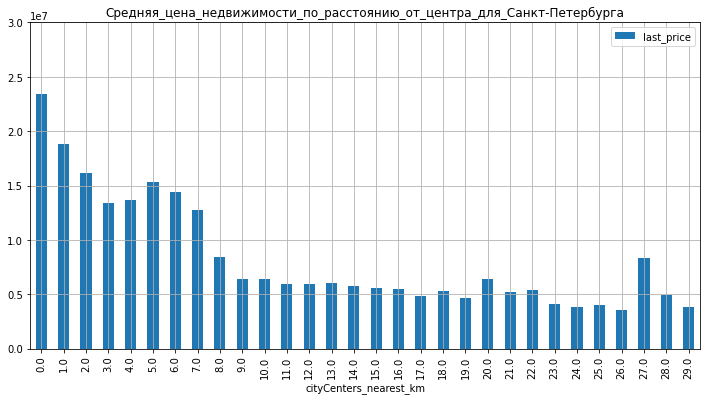

In [98]:
(data.query('locality_name == "Санкт-Петербург" \
                & ~cityCenters_nearest_km.isna()')
    .pivot_table(index='cityCenters_nearest_km', 
                 values='last_price',aggfunc='mean'
                )
         .plot(kind='bar', title='Средняя_цена_недвижимости_по_расстоянию_от_центра_для_Санкт-Петербурга',
               figsize=(12,6), grid=True, ylim=(0, 0.3 * 10 ** 8)
              )
);

Для того, чтобы рассчитать среднюю цену для каждого километра удаленности от центра мы построили сводную таблицу и линейчатую диаграмму.

По полученным результатам можно однозначно сказать, что средняя цена объекта недвижимости сокращается по мере удаления местоположения объекта от центра города.

**Вывод**: на данном шаге был проведен исследовательский анализ по выявлению взаимосвязи между ценой жилья и различными параметрами. Для этого строились различные графики и таблицы. Более подробные выводы по выявленным взаимосвязям будут отображены в общем выводе ниже.

Также был проведен анализ скорости продажи квартир. Можно сказать, что если квартира продалась быстрее, чем за 1.5 месяца, то это можно считать быстрой продажей, если же квартира продавалась более 8 месяцев , то это можно считать долгой продажей. Таким образом, норма - от 1,5 до 8 месяцев.

## Общий вывод

*Целью данного исследования является поиск параметров, которые определяют рыночную стоимость жилой недвижимости.*

Для анализа нам был предоставлен набор данных, содержащий информацию об объявлениях о продажах квартир в Санкт-Петербурге и Ленинградской области за 2014-2019 гг. с сайта [Яндекс.Недвижимость](https://realty.yandex.ru/).

Сначала мы ознакомились с таблицей, её полями, количеством записей, типами данных полей.
Далее мы провели предобработку данных:
* избавились от пропусков в большинстве случаев главным образом путём замены пропусков на наиболее подходящие логически и математически значения
* произвели изменения типов данных полей, в которых тип данных был задан неверно
* обработали неявные дубликаты в поле `locality_name`
* нашли и обработали аномалии и выбросы в данных


После были произведены вспомогательные расчёты и собственно проведен исследовательский анализ данных, направленный на выявление зависимости стоимости недвижимости от различных параметров.

**Итак, от чего же зависит рыночная стоимость недвижимости:**
1. В первую очередь от **общей площади** самого объекта недвижимости, связь цены с этим показателем наиболее тесная из представленных, здесь положительная связь с коэффициентом корреляции 0.65, т.е. чем больше площадь жилья, тем выше его рыночная стоимость.
2. На стоимость жилого объекта также влияет на каком **типе этажа** он расположен, самые высокие цены характерны для "средних" этажей, далее по уровню цен идут квартиры на последних этажах, и самые дешёвые квартиры располагаются в большинстве случаев на первых этажах. 
3. Также удалось заметить, что медианная рыночная цена увеличивается при увеличении **количества комнат** до 7.

4. Бесусловно на цену влияет и принадлежность к **населенному пункту**, в котором находится объект недвижимости, для крупных городов-областных центров и их спутников уровень цен на жильё будет значительно выше, чем в области.

5. На цену жилья также влияет такой параметр, как **близость к центру города**, особенно это актуально для крупных городов, таких как Санкт-Петербург, чем ближе к центру находится объект, тем он будет дороже.

Эти параметры можно использовать для построения автоматической системы отслеживания аномалий и мошенников в объявлениях.